## __boundary condition playground__

In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [2]:
import matplotlib.pyplot as plt

In [3]:
from src.boundary import build_boundary, affine_boundary, sinusoidal_boundary, checkerboard_boundary, door_boundary, random_chunk_boundary

In [4]:
from src.domains import rectangle_domain
from src.runningcost import zero_cost
from src.problem import make_problem
from src.solver import solve_equation
from src.viz import plot_u, plot_residual, write_video, plot_delta_residual_sweep, plot_alpha, plot_u_alpha_diff
from src.experiments import sweep_deltas, run_random_policies

In [5]:
# problem setup
nx = ny = 50
mask = rectangle_domain(nx, ny)
f = zero_cost(nx, ny)

### __sinusoidal__

In [35]:
g = build_boundary(nx, ny, mask, sinusoidal_boundary())
problem = make_problem(nx, ny, mask=mask, g=g, f=f, h=1.0)

In [36]:
uJ, policyJ, histJ, snapsJ, itersJ = solve_equation(problem, method="jacobi", tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 3573 iterations.


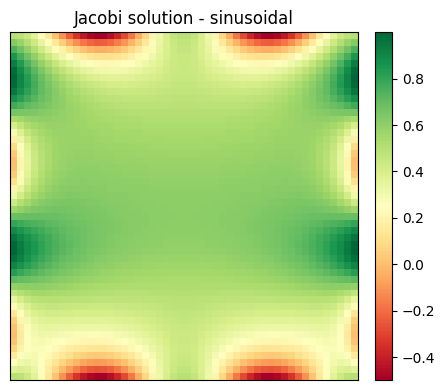

In [37]:
plot_u(uJ, "Jacobi solution - sinusoidal")

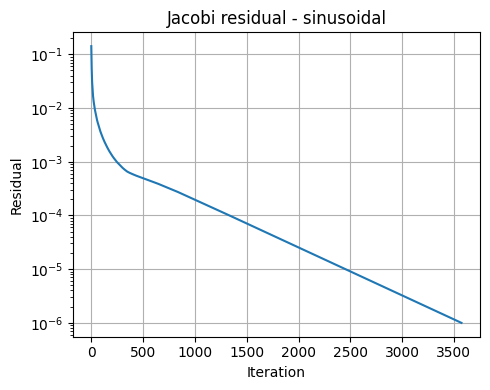

In [38]:
plot_residual(histJ, "Jacobi residual - sinusoidal")

### __checkerboard__

In [39]:
g = build_boundary(nx, ny, mask, checkerboard_boundary())
problem = make_problem(nx, ny, mask=mask, g=g, f=f, h=1.0)

In [40]:
uJ, policyJ, histJ, snapsJ, itersJ = solve_equation(problem, method="jacobi", tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 3173 iterations.


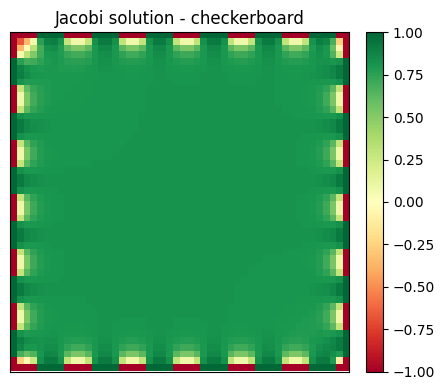

In [41]:
plot_u(uJ, "Jacobi solution - checkerboard")

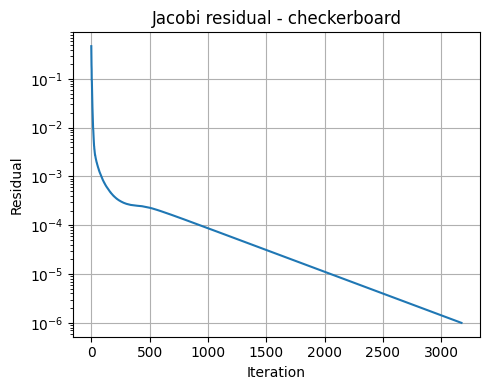

In [42]:
plot_residual(histJ, "Jacobi residual - checkerboard")

In [43]:
movie_path = PROJECT_ROOT / "movies" / "jacobi_checkerboard.mp4"
write_video(snapsJ, itersJ, filename=movie_path, fps=10)

### __door__

In [44]:
g = build_boundary(nx, ny, mask, door_boundary())
problem = make_problem(nx, ny, mask=mask, g=g, f=f, h=1.0)

In [45]:
uJ, policyJ, histJ, snapsJ, itersJ = solve_equation(problem, method="jacobi", tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 3884 iterations.


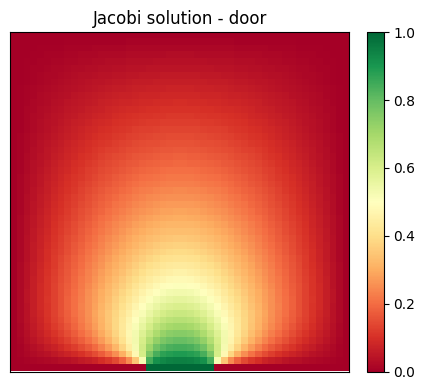

In [46]:
plot_u(uJ, "Jacobi solution - door")

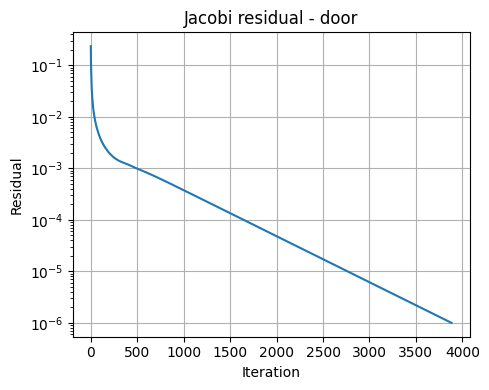

In [47]:
plot_residual(histJ, "Jacobi residual - door")

In [48]:
movie_path = PROJECT_ROOT / "movies" / "jacobi_door.mp4"
write_video(snapsJ, itersJ, filename=movie_path, fps=10)

### __random chunk__

In [6]:
g = build_boundary(nx, ny, mask, random_chunk_boundary(nx, ny))
problem = make_problem(nx, ny, mask=mask, g=g, f=f, h=1.0)

In [7]:
uJ, policyJ, histJ, snapsJ, itersJ = solve_equation(problem, method="jacobi", tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 3892 iterations.


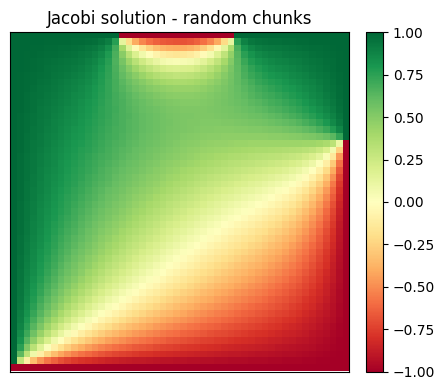

In [8]:
plot_u(uJ, "Jacobi solution - random chunks")

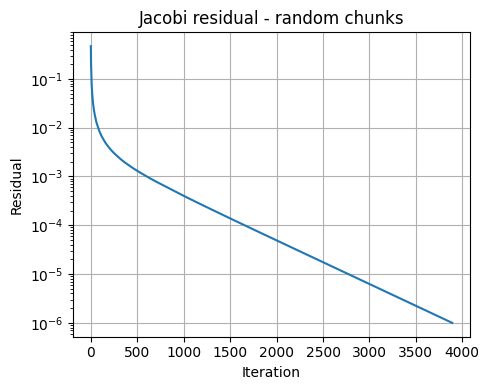

In [9]:
plot_residual(histJ, "Jacobi residual - random chunks")

In [10]:
movie_path = PROJECT_ROOT / "movies" / "jacobi_random_chunks.mp4"
write_video(snapsJ, itersJ, filename=movie_path, fps=10)